(ode-chapter)=

# Ordinary Differential Equations (ODE)

An Ordinary Differential Equation (ODE) is an equation which relates a function of a single independent variable to its derivatives and describe how a quantity changes with respect to another. ODEs are called *ordinary* to distinguish them from Partial Differential Equations (PDEs), which involve functions of multiple variables and their partial derivative.

A simple ODE can be solved using analytical methods such as integration and Laplace transforms, however the vast majority of ODEs used in the real world cannot be solved using analytical methods which is why we need a numerical approach.

````{prf:definition} Ordinary Differential Equation

An Ordinary Differential Equation (ODE) is an equation of the form

$$ y^{(n)}(t) = f(t, y, y', y'', \ldots, y^{(n-1)}), $$

where $t$ is an independent variable, $y$ is a differentiable function of $t$ and $y'$, $y''$ etc. are derivatives of $y$.
````

The solution of an ODE is the function $y$ that satisfies the ODE over the domain of $t$. For example, consider the following ODE

```{math}
:label: simple-ode-equation
y' = ky, 
```

where $t \in \mathbb{R}$. Rewriting this using Leibniz notation and integrating both sides we have

$$ \begin{align*}
    \frac{\mathrm{d} y}{\mathrm{d} t} & = ky \\
    \frac{\mathrm{d} y}{y} &= k \mathrm{d} t \\
    \int \frac{1}{y} \mathrm{d} y &= \int k \mathrm{d} t \\
    \ln (y) + c_1 &= kt + c_2 \\
    \ln (y) &= kt + c_2 - c_1
\end{align*} $$

Solving for $y$ gives

$$ \begin{align*}
    y &= e^{kt + c_2 - c_1} = e^{kt}e^{c_2 - c_1} = Ce^{kt},
\end{align*} $$

where $C = e^{c_2 - c_1}$ is some constant. Note that there are an infinite number of solutions since $C$ can be any value. However, if we know that the value of the solution $y$ for some value of $t$ then we can calculate $C$ and give us a single solution to the ODE. For example, if the solution to the ODE in equation {eq}`simple-ode-equation` where $t = 0$ is known to be $y(0) = y_0$ then

$$ \begin{align*}
    y_0 &= C e^{k(0)} = C e^0 = C,
\end{align*} $$

so the ODE has the solution

$$ \begin{align*}
    y &= y_0 e^{kt}.
\end{align*} $$

So if $y(0) = 1$ then the solution is $y = e^{kt}$, and if $y(0) = 2$ then the solution is $y = 2e^{kt}$. 

```{glue:figure} ode_plot
:name: ode-plot-figure
:figwidth: 600

Plots of some of the possible solution to the ODE $y' = y$.
```

Problems that are described using ODEs where the initial solution at $t = 0$ is known are known as **Initial Value Problems (IVP)**.

````{prf:definition} Initial value problem
:label: ivp-definition

An Initial Value Problem (IVP) is an ODE where the initial solution at the lower boundary of the domain is known. For example,

$$ \begin{align*}
    y' = f(t,y), \qquad t \in [t_0, t_{\max}], \qquad y(t_0) = y_0.
\end{align*} $$

Here a first-order ODE $y'=f(t,y)$ is defined over the domain $t\in [t_0 , t_{\max}]$ and the initial solution $y(t_0)$ is the known value $y_0$. 
````

For most real world practical applications initial value problems cannot be solved using analytical methods so instead we use numerical methods to approximate the solution. These notes will cover a common class of numerical methods used to solve initial value problems called Runge-Kutta methods.

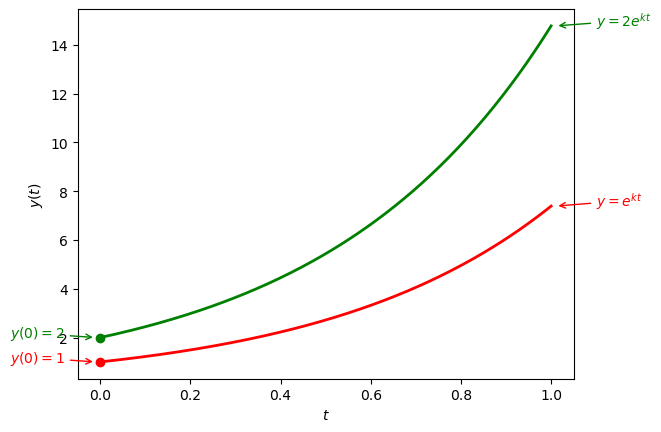

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from myst_nb import glue

k = 2
c1, c2 = 1, 2
t = np.linspace(0, 1, 200)
y0 = np.arange(0, 3.1, 0.25)
y = np.zeros((len(t), len(y0)))

for i in range(len(y0)):
    y[:,i] = y0[i] * np.exp(k * t)


fig, ax = plt.subplots()
plt.plot(t, y, 'b', linewidth=1)
plt.plot(t, c1 * np.exp(k * t), "r", linewidth=2)
plt.plot(t, c2 * np.exp(k * t), "g", linewidth=2)
plt.plot(0, 1, "ro")
plt.plot(0, 2, "go")

plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.annotate("$y(0)=1$", xy=(-0.01,c1), xytext=(-0.2,c1), color="r", arrowprops=dict(arrowstyle='->',shrinkA=2, shrinkB=2, ec="r"))
plt.annotate("$y(0)=2$", xy=(-0.01,c2), xytext=(-0.2,c2), color="g", arrowprops=dict(arrowstyle='->',shrinkA=2, shrinkB=2, ec="g"))
plt.annotate("$y = e^{kt}$", xy=(t[-1]+0.01,c1*np.exp(k * t[-1])), 
             xytext=(t[-1]+0.1, c1*np.exp(k*t[-1])), color="r", arrowprops=dict(arrowstyle="->", shrinkA=2, shrinkB=2, ec="r"))
plt.annotate("$y = 2e^{kt}$", xy=(t[-1]+0.01,c2*np.exp(k * t[-1])), 
             xytext=(t[-1]+0.1, c2*np.exp(k*t[-1])), color="g",
            arrowprops=dict(arrowstyle="->", shrinkA=2, shrinkB=2, ec="g"))

glue("ode_plot", fig, display=False)
